# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
city = cities[0]
city

'bilibino'

In [4]:
city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
response = requests.get(city_url)
city_weather = response.json()
city_weather

{'coord': {'lon': 166.4372, 'lat': 68.0546},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': -9.2,
  'feels_like': -17.34,
  'temp_min': -9.2,
  'temp_max': -9.2,
  'pressure': 1005,
  'humidity': 99,
  'sea_level': 1005,
  'grnd_level': 966},
 'visibility': 423,
 'wind': {'speed': 3.02, 'deg': 249, 'gust': 2.68},
 'clouds': {'all': 100},
 'dt': 1701662157,
 'sys': {'country': 'RU', 'sunrise': 1701647137, 'sunset': 1701654178},
 'timezone': 43200,
 'id': 2126682,
 'name': 'Bilibino',
 'cod': 200}

In [5]:
city_lat = city_weather["coord"]["lat"]
# city_lat = city_weather.get("coord", {}).get("lat", None)

city_lng = city_weather["coord"]["lon"]
city_max_temp = city_weather["main"]["temp_max"]
city_humidity = city_weather["main"]["humidity"]
city_clouds = city_weather["clouds"]["all"]
city_wind = city_weather["wind"]["speed"]
city_country = city_weather["sys"]["country"]
city_date = city_weather["dt"]

In [6]:
{"City": city, 
  "Lat": city_lat, 
  "Lng": city_lng, 
  "Max Temp": city_max_temp,
  "Humidity": city_humidity,
  "Cloudiness": city_clouds,
  "Wind Speed": city_wind,
  "Country": city_country,
  "Date": city_date}

{'City': 'bilibino',
 'Lat': 68.0546,
 'Lng': 166.4372,
 'Max Temp': -9.2,
 'Humidity': 99,
 'Cloudiness': 100,
 'Wind Speed': 3.02,
 'Country': 'RU',
 'Date': 1701662157}

In [27]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities[0:50]):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url)
    
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(e)
        print(f"City {city} not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | ahau
'coord'
City ahau not found. Skipping...
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | egilsstadir
Processing Record 9 of Set 1 | suda
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | wailua homesteads
Processing Record 12 of Set 1 | international falls
Processing Record 13 of Set 1 | ketchikan
Processing Record 14 of Set 1 | chinde
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | selfoss
Processing Record 17 of Set 1 | oume
Processing Record 18 of Set 1 | ixtapa
Processing Record 19 of Set 1 | codrington
Processing Record 20 of Set 1 | warangal
Processing Record 21 of Set 1 | grytviken
Proces

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          47
Lat           47
Lng           47
Max Temp      47
Humidity      47
Cloudiness    47
Wind Speed    47
Country       47
Date          47
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,-9.20,99,100,3.02,RU,1701662302
1,georgetown,5.4112,100.3354,89.53,79,20,4.61,MY,1701662302
2,puerto natales,-51.7236,-72.4875,42.85,88,83,7.85,CL,1701662303
3,blackmans bay,-43.0167,147.3167,70.74,54,100,1.99,AU,1701662304
4,waitangi,-43.9535,-176.5597,57.81,73,100,3.00,NZ,1701662247


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-9.20,99,100,3.02,RU,1701662302
1,georgetown,5.4112,100.3354,89.53,79,20,4.61,MY,1701662302
2,puerto natales,-51.7236,-72.4875,42.85,88,83,7.85,CL,1701662303
3,blackmans bay,-43.0167,147.3167,70.74,54,100,1.99,AU,1701662304
4,waitangi,-43.9535,-176.5597,57.81,73,100,3.00,NZ,1701662247


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

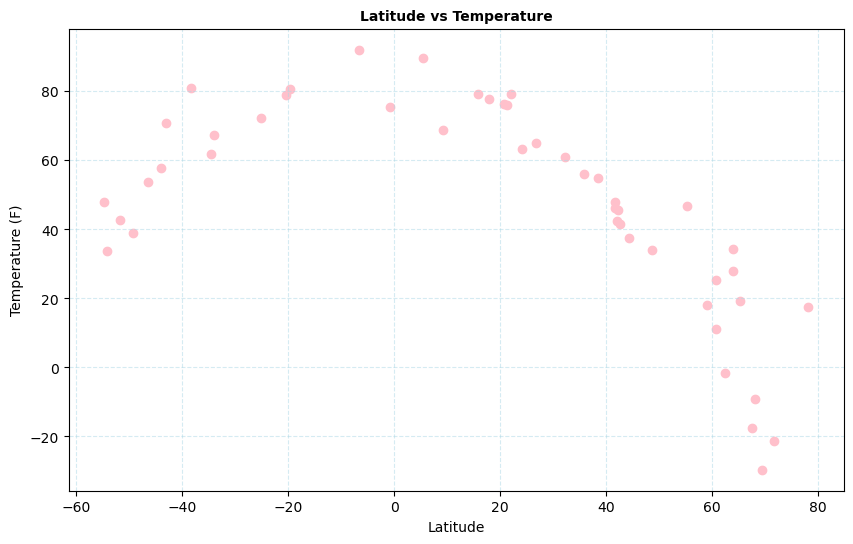

In [32]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10,6))
plt.scatter(city_data_df.Lat, city_data_df["Max Temp"], color="pink")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=10)
plt.grid(color="lightblue", alpha=0.5, linestyle="--")
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

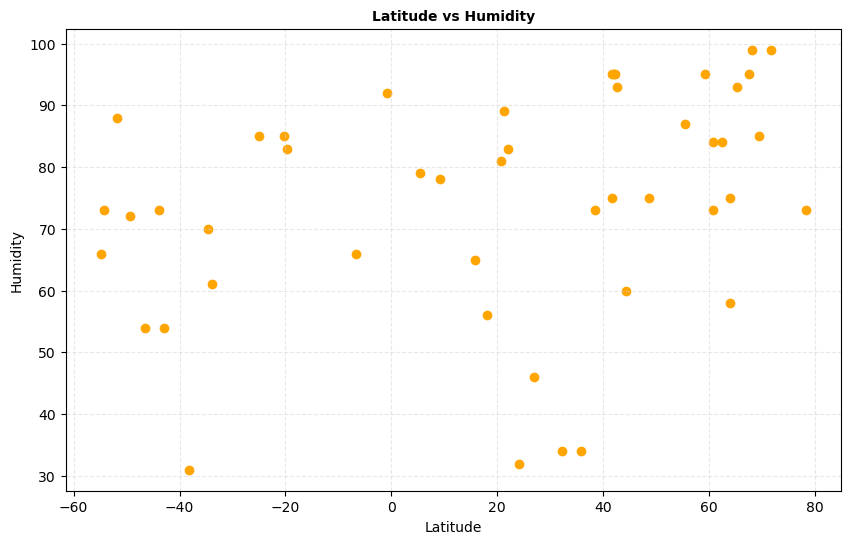

In [33]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.figure(figsize=(10,6))
plt.scatter(city_data_df.Lat, city_data_df["Humidity"], color="orange")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=10)
plt.grid(color="lightgrey", alpha=0.5, linestyle="--")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

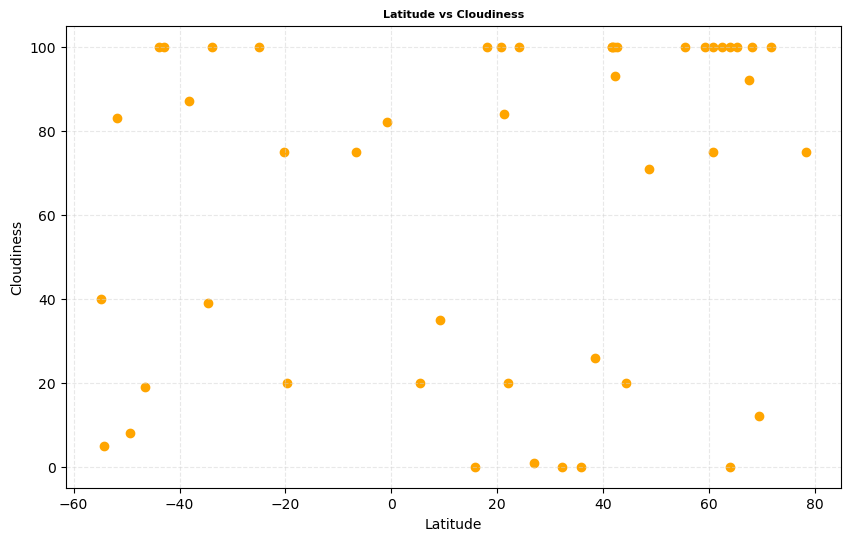

In [34]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10,6))
plt.scatter(city_data_df.Lat, city_data_df["Cloudiness"], color="orange")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=8)
plt.grid(color="lightgrey", alpha=0.5, linestyle="--")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

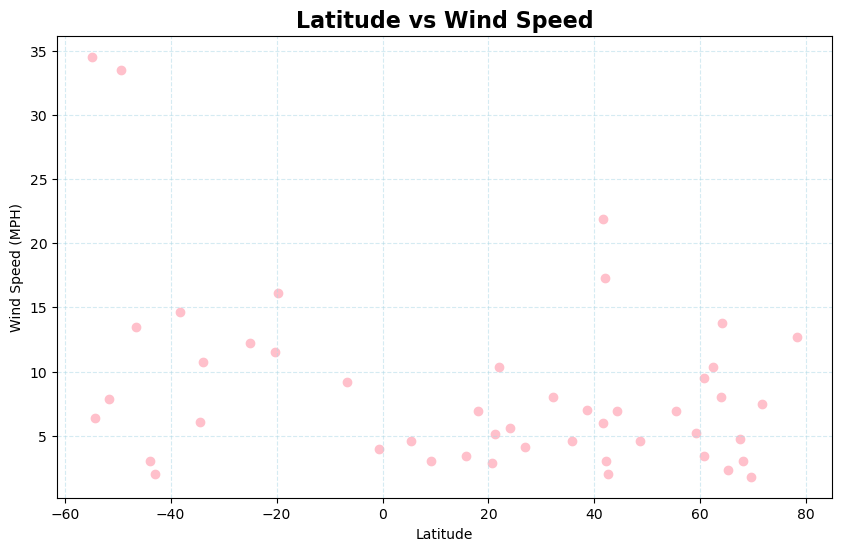

In [35]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10,6))
plt.scatter(city_data_df.Lat, city_data_df["Wind Speed"], color="pink")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16)
plt.grid(color="lightblue", alpha=0.5, linestyle="--")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [48]:
# Define a function to create Linear Regression plots

def makeLinearRegressionPlot(x_values, y_values, y_col, hemi, annot_loc):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, annot_loc, fontsize=10, color="#4D2D52")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_col}')
    plt.title(f'Latitude vs {y_col} ({hemi} Hemi)')
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-9.20,99,100,3.02,RU,1701662302
1,georgetown,5.4112,100.3354,89.53,79,20,4.61,MY,1701662302
6,egilsstadir,65.2653,-14.3948,19.31,93,100,2.30,IS,1701662305
7,suda,59.1525,37.5582,18.07,95,100,5.21,RU,1701662305
9,wailua homesteads,22.0669,-159.3780,79.23,83,20,10.36,US,1701662258


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto natales,-51.7236,-72.4875,42.85,88,83,7.85,CL,1701662303
3,blackmans bay,-43.0167,147.3167,70.74,54,100,1.99,AU,1701662304
4,waitangi,-43.9535,-176.5597,57.81,73,100,3.00,NZ,1701662247
5,port-aux-francais,-49.3500,70.2167,39.06,72,8,33.46,TF,1701662305
8,port mathurin,-19.6833,63.4167,80.69,83,20,16.11,MU,1701662306


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.82409821228696


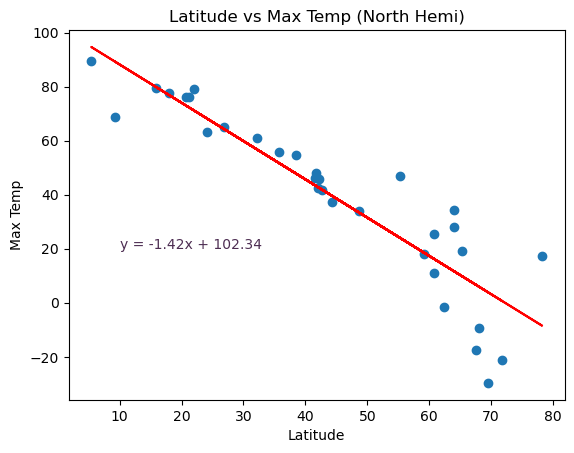

In [51]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
makeLinearRegressionPlot(x_values, y_values, "Max Temp", "North", (10, 20))

The r-squared is: 0.6844477817875367


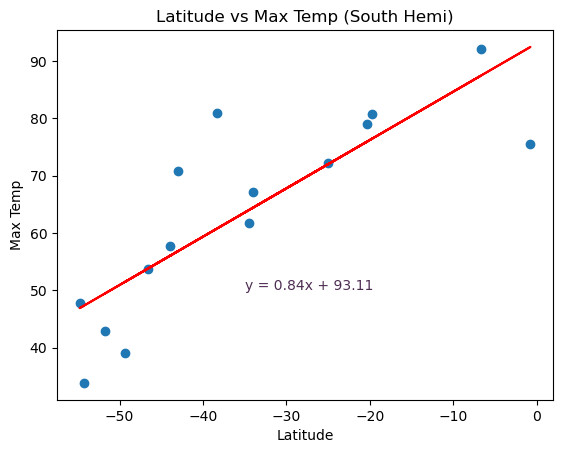

In [52]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

makeLinearRegressionPlot(x_values, y_values, "Max Temp", "South", (-35, 50))

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.14033067319096304


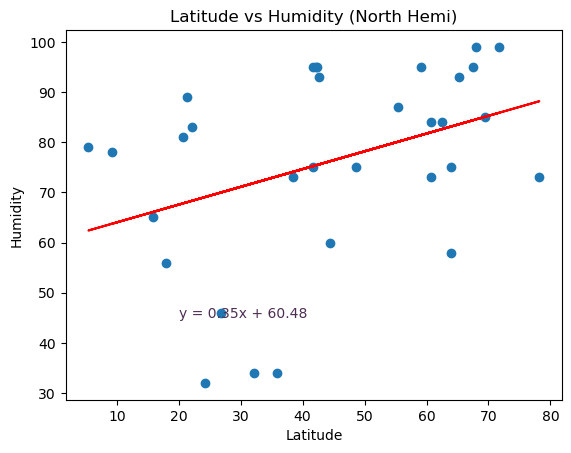

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

makeLinearRegressionPlot(x_values, y_values, "Humidity", "North", (20, 45))

The r-squared is: 0.11655509283302296


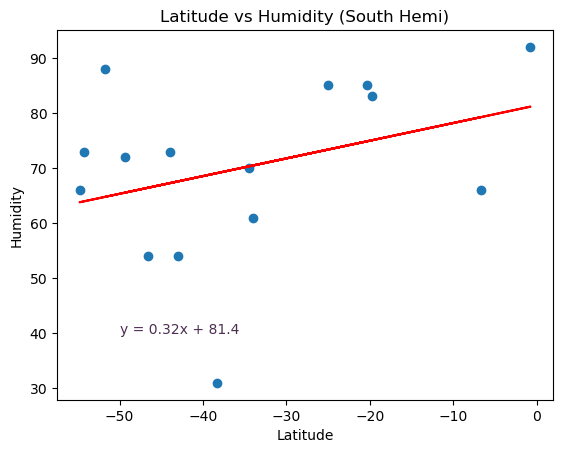

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

makeLinearRegressionPlot(x_values, y_values, "Humidity", "South", (-50, 40))

**Discussion about the linear relationship:** The linear regression shows that the higher the latitude, the higher the humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.11726132900804595


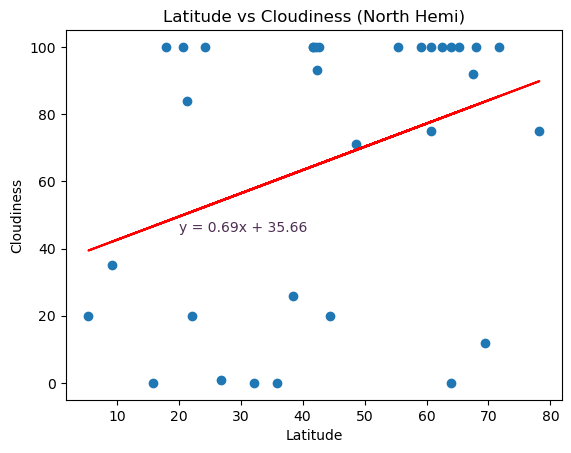

In [55]:
# Northern Hemisphere
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

makeLinearRegressionPlot(x_values, y_values, "Cloudiness", "North", (20, 45))

The r-squared is: 0.10029480467816725


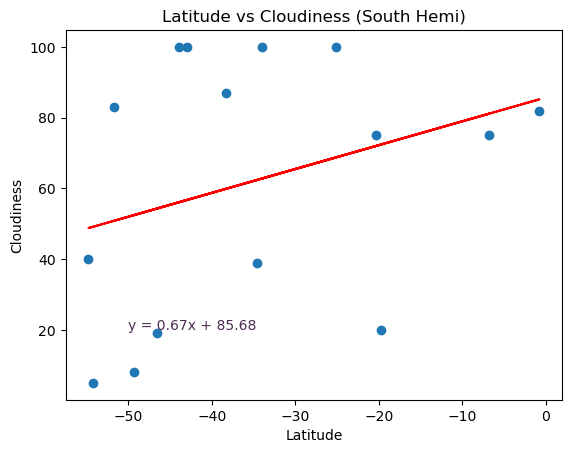

In [56]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

makeLinearRegressionPlot(x_values, y_values, "Cloudiness", "South", (-50, 20))

**Discussion about the linear relationship:** The linear regression shows that the higher the latitude, the higher the cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.023178479636241832


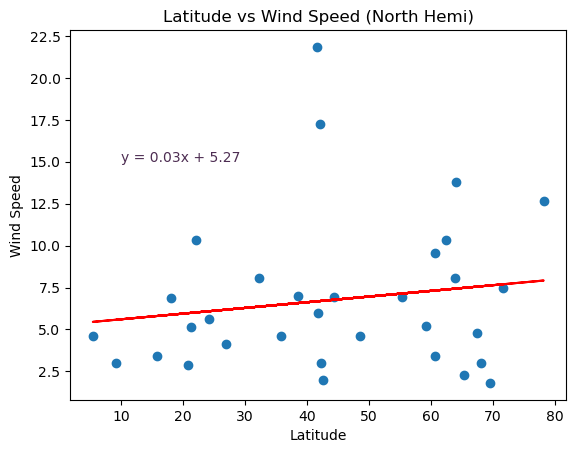

In [57]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

makeLinearRegressionPlot(x_values, y_values, "Wind Speed", "North", (10, 15))

The r-squared is: 0.023178479636241832


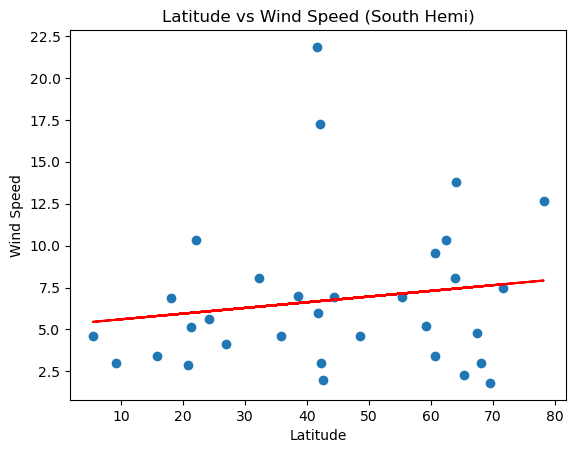

In [59]:
# Southern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

makeLinearRegressionPlot(x_values, y_values, "Wind Speed", "South", (-50, -20))

**Discussion about the linear relationship:** The linear regression is generally insignificant, though it does show a slightly positive correlation